In [ ]:
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%config InlineBackend.figure_format='retina'
import io
from google.colab import files
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
uploaded = files.upload()

TypeError: ignored

In [ ]:
Features = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
#data = S_data.sample(frac=1)
Target = pd.read_csv(io.BytesIO(uploaded['Target.csv']))
#data = S_data.sample(frac=1)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(Features, Target, test_size=0.3, random_state=1)
###############################################
#Variables
y_train=np.reshape(y_train_S.values, (-1,1))
y_test=np.reshape(y_test_S.values, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train_S))
X_train = scaler_x.transform(X_train_S)
print(scaler_x.fit(X_test_S))
X_test = scaler_x.transform(X_test_S)

print(scaler_y.fit(y_train_S.values))
y_train = scaler_y.transform(y_train_S.values)
print(scaler_y.fit(y_test_S.values))
y_test = scaler_y.transform(y_test_S.values)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
import xgboost as xgb
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train) # Model without hyperparameter optimization

[13:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train))) # Model without hyperparameter optimization
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test))) # Model without hyperparameter optimization

Coefficient of determination R^2 <-- on train set: 0.9942535594123503
Coefficient of determination R^2 <-- on test set: 0.9589343356054595


In [ ]:
import xgboost as xgb
xgb.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor_RSCV=xgb.XGBRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor_RSCV, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
xg_random.fit(X_train,y_train) # Model with RandomizedSearchCV

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[12:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [ ]:
xg_random.best_params_ #Best parameters

{'learning_rate': '0.05',
 'max_depth': 30,
 'min_child_weight': 5,
 'n_estimators': 400,
 'subsample': 0.6}

In [ ]:
predictions=xg_random.predict(X_test)
train_pred =xg_random.predict(X_train)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R square train data:', np.sqrt(metrics.r2_score(y_train, train_pred)))
print('R square test data:', np.sqrt(metrics.r2_score(y_test, predictions)))


MAE: 0.03056108190801405
MSE: 0.0028843055362916576
RMSE: 0.05370573094458037
R square train data: 0.999677109131881
R square test data: 0.9733054647152675


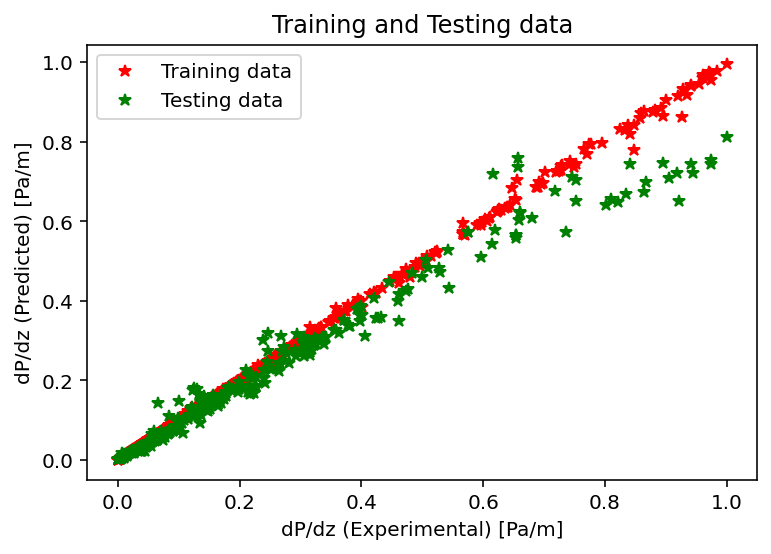

In [ ]:
plt.plot(y_train, train_pred,'*r', label = 'Training data' )
plt.plot(y_test, predictions, '*g', label = 'Testing data')
plt.title( 'Training and Testing data')
plt.xlabel('dP/dz (Experimental) [Pa/m]')
plt.ylabel('dP/dz (Predicted) [Pa/m]')
plt.legend()
plt.show()

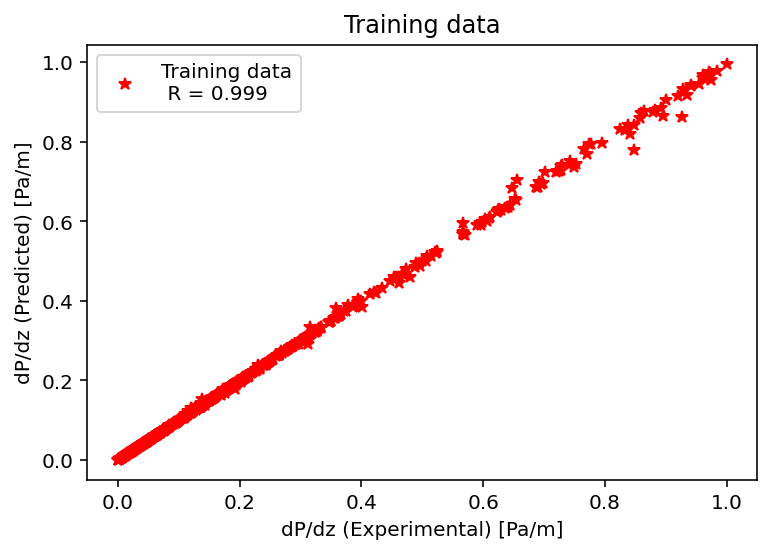

In [ ]:
plt.plot(y_train, train_pred,'*r', label = 'Training data\n R = 0.999 ' )
#plt.plot(y_test, y_test_pred, '*g', label = 'Testing data')
plt.title( 'Training data')
plt.xlabel('dP/dz (Experimental) [Pa/m]')
plt.ylabel('dP/dz (Predicted) [Pa/m]')
plt.legend()
plt.show()

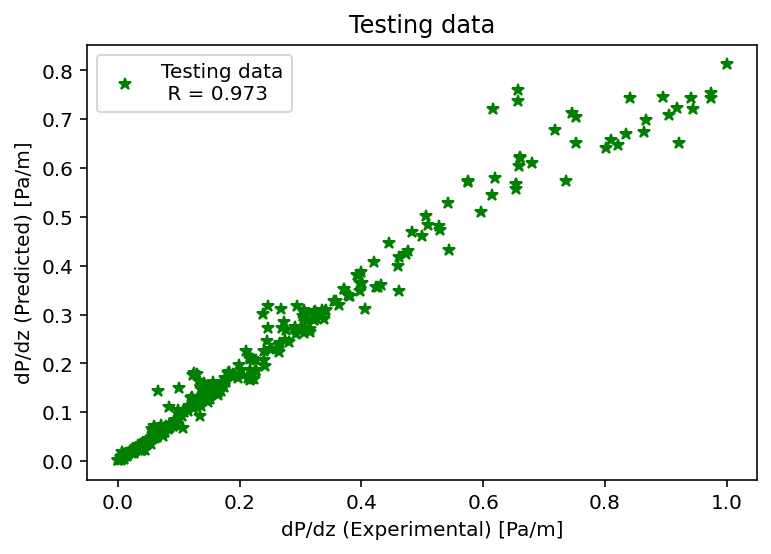

In [ ]:
#plt.plot(y_train, y_train_pred,'*r', label = 'Training data\n R = 0.979 ' )
plt.plot(y_test, predictions, '*g', label = 'Testing data\n R = 0.973')
plt.title( 'Testing data')
plt.xlabel('dP/dz (Experimental) [Pa/m]')
plt.ylabel('dP/dz (Predicted) [Pa/m]')
plt.legend()
plt.show()

#SHAP

In [ ]:
pip install shap

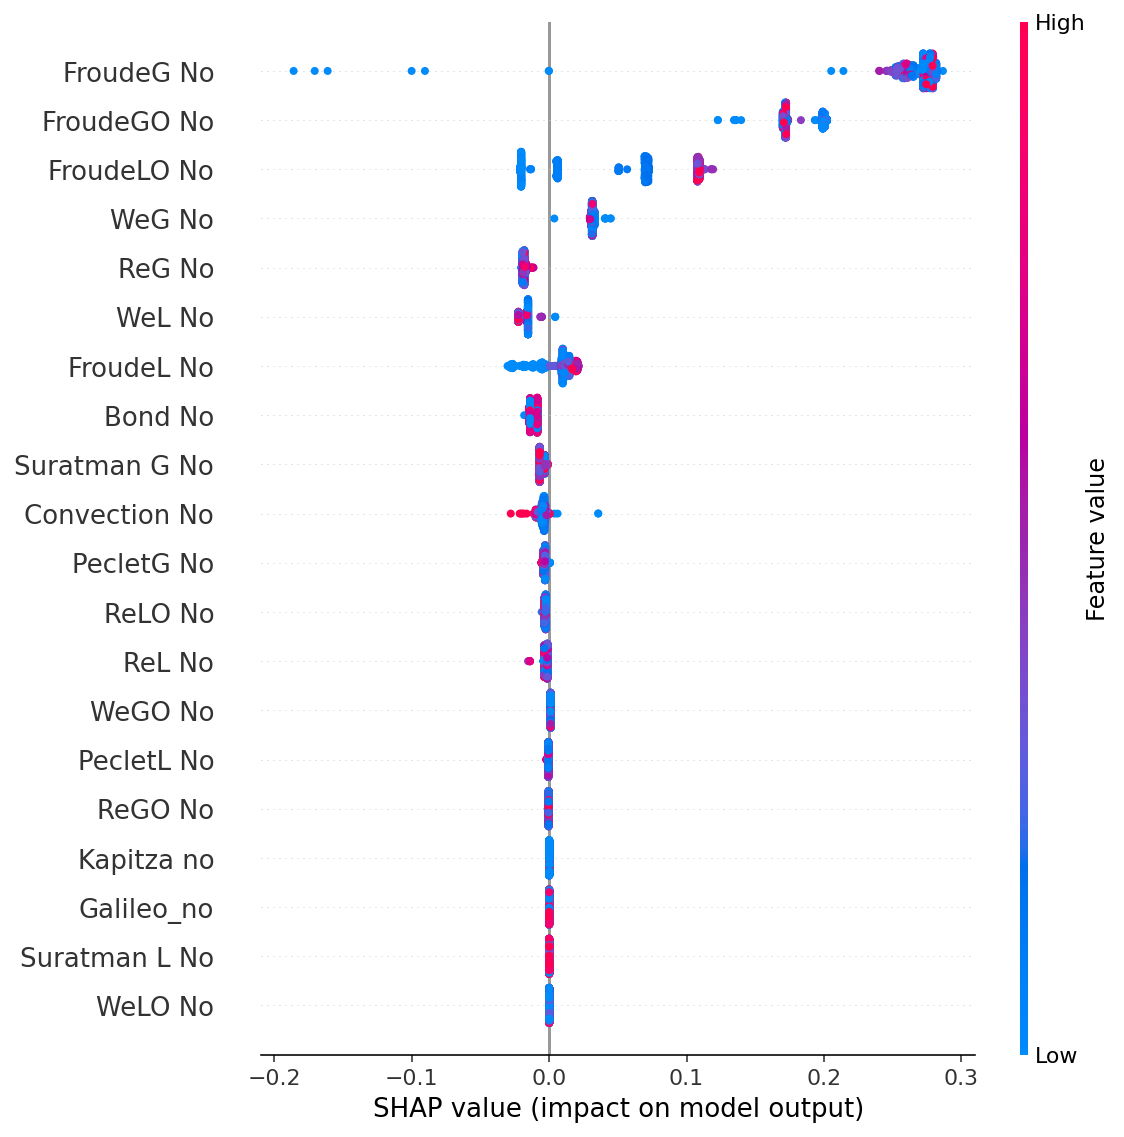

In [ ]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(Features)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, Features)

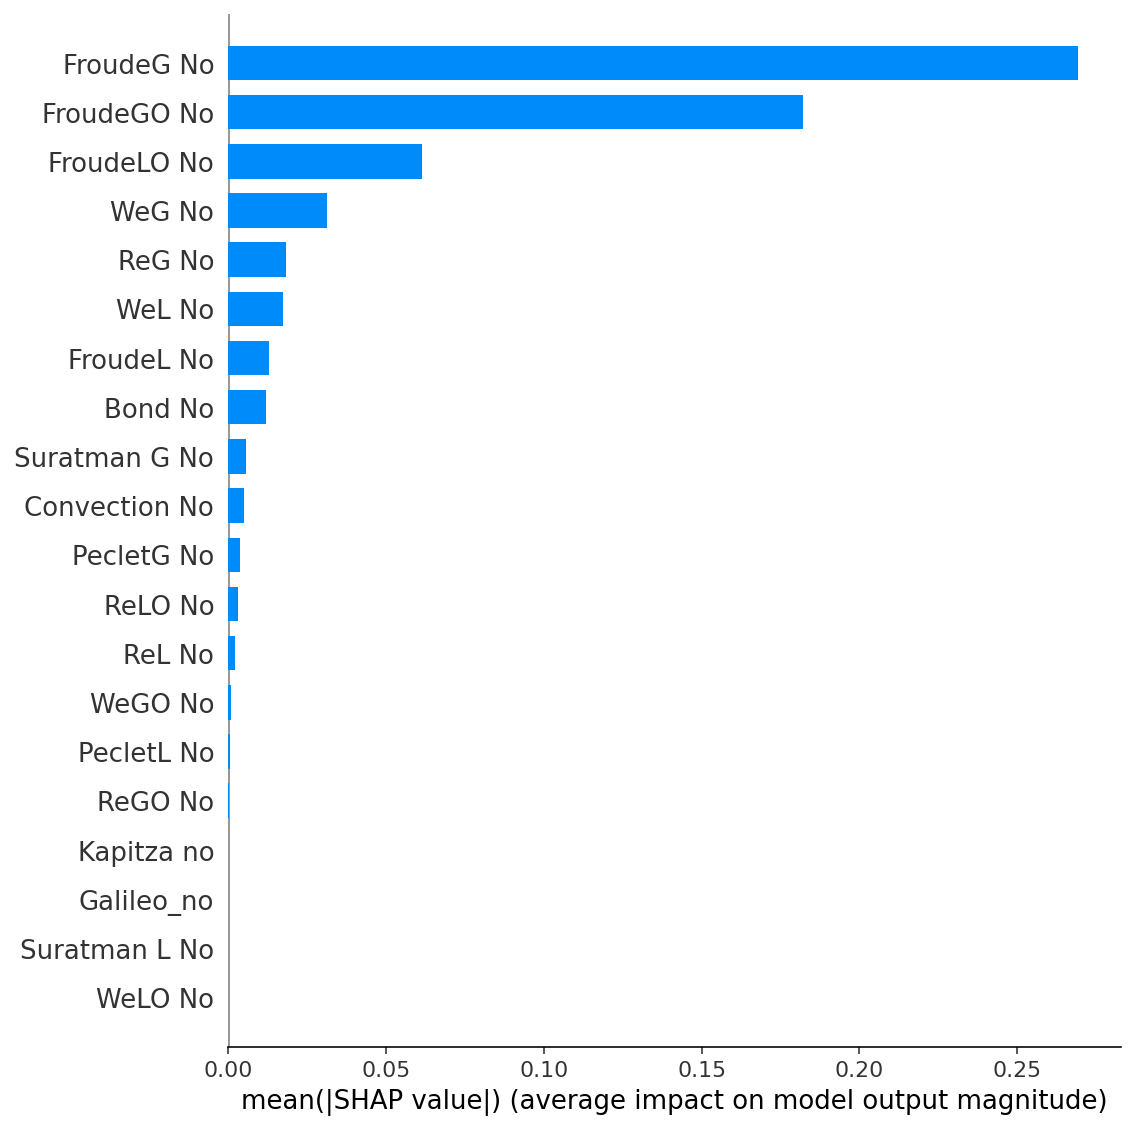

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, Features, plot_type="bar")

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], Features.iloc[0,:])

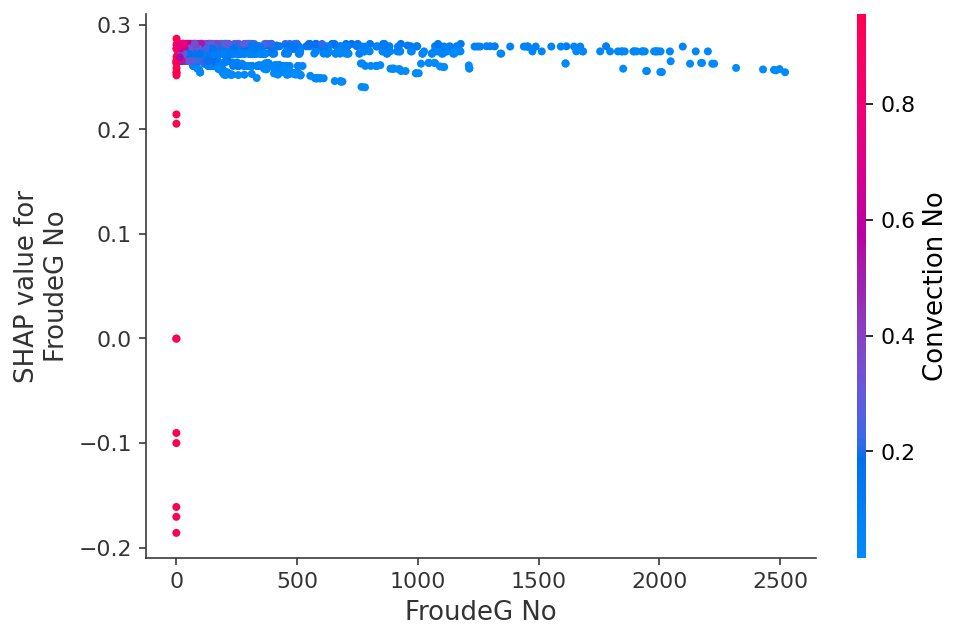

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.initjs()
shap.dependence_plot("FroudeG No", shap_values, Features)

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, Features)

#Result

In [ ]:
pip install XlsxWriter

     |████████████████████████████████| 153kB 12.2MB/s 


In [ ]:
uploaded = files.upload()

Saving Features.csv to Features (1).csv
Saving R7_1_R22.csv to R7_1_R22.csv
Saving R7_1_R134a.csv to R7_1_R134a.csv
Saving R7_1_R410a.csv to R7_1_R410a.csv
Saving R7_2_R22.csv to R7_2_R22.csv
Saving R7_2_R134a.csv to R7_2_R134a.csv
Saving R7_2_R410a.csv to R7_2_R410a.csv
Saving R8_1_150.csv to R8_1_150.csv
Saving R8_1_300.csv to R8_1_300.csv
Saving R8_1_500.csv to R8_1_500.csv
Saving R8_1_600.csv to R8_1_600.csv
Saving R8_2_200.csv to R8_2_200.csv
Saving R8_2_300.csv to R8_2_300.csv
Saving R8_2_350.csv to R8_2_350.csv
Saving R8_2_500.csv to R8_2_500.csv
Saving R22_8mm.csv to R22_8mm.csv
Saving R22_13_8mm.csv to R22_13_8mm.csv
Saving R410_8mm.csv to R410_8mm.csv
Saving R410_13_8mm.csv to R410_13_8mm.csv


In [ ]:
All_data = pd.read_csv(io.BytesIO(uploaded['Features.csv']))
Xnew = All_data
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)
ynew=np.reshape(ynew, (-1,1))
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('Results_All_data_RF.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#6_1

In [ ]:
R22_8mm = pd.read_csv(io.BytesIO(uploaded['R22_8mm.csv']))
Xnew = R22_8mm
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)
ynew=np.reshape(ynew, (-1,1))
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
df2=pd.DataFrame(ynew)
writer = pd.ExcelWriter('RFR_R22_8mm.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R22_13_8mm = pd.read_csv(io.BytesIO(uploaded['R22_13_8mm.csv']))
Xnew = R22_13_8mm
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_R22_13_8mm.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#6_2

In [ ]:
R410_8mm = pd.read_csv(io.BytesIO(uploaded['R410_8mm.csv']))
Xnew = R410_8mm
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_R410_8mm.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
R410_13_8mm = pd.read_csv(io.BytesIO(uploaded['R410_13_8mm.csv']))
Xnew = R410_13_8mm
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_R410_13_8mm.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#7_1

In [ ]:
In_7_1_R22 = pd.read_csv(io.BytesIO(uploaded['R7_1_R22.csv']))
Xnew = In_7_1_R22
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_7_1_R22.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_7_1_R134a = pd.read_csv(io.BytesIO(uploaded['R7_1_R134a.csv']))
Xnew = In_7_1_R134a
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_7_1_R134a.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_7_1_R410a = pd.read_csv(io.BytesIO(uploaded['R7_1_R410a.csv']))
Xnew = In_7_1_R410a
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_7_1_R410a.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#7_2


In [ ]:
In_7_2_R22 = pd.read_csv(io.BytesIO(uploaded['R7_2_R22.csv']))
Xnew = In_7_2_R22
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)


ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_7_2_R22.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_7_2_R134a = pd.read_csv(io.BytesIO(uploaded['R7_2_R134a.csv']))
Xnew = In_7_2_R134a 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_7_2_R134a.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_7_2_R410a = pd.read_csv(io.BytesIO(uploaded['R7_2_R410a.csv']))
Xnew = In_7_2_R410a 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_7_2_R410a .xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#8_1

In [ ]:
In_8_1_150 = pd.read_csv(io.BytesIO(uploaded['R8_1_150.csv']))
Xnew = In_8_1_150 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_1_150.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_8_1_300 = pd.read_csv(io.BytesIO(uploaded['R8_1_300.csv']))
Xnew = In_8_1_300 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_1_300.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_8_1_500 = pd.read_csv(io.BytesIO(uploaded['R8_1_500.csv']))
Xnew = In_8_1_500 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_1_500.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_8_1_600 = pd.read_csv(io.BytesIO(uploaded['R8_1_600.csv']))
Xnew = In_8_1_600 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_1_600.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#8_2

In [ ]:
In_8_2_200 = pd.read_csv(io.BytesIO(uploaded['R8_2_200.csv']))
Xnew = In_8_2_200 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_2_200.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_8_2_300 = pd.read_csv(io.BytesIO(uploaded['R8_2_300.csv']))
Xnew = In_8_2_300 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_2_300.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_8_2_350 = pd.read_csv(io.BytesIO(uploaded['R8_2_350.csv']))
Xnew = In_8_2_350 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_2_350.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

In [ ]:
In_8_2_500 = pd.read_csv(io.BytesIO(uploaded['R8_2_500.csv']))
Xnew = In_8_2_500 
Xnew= scaler_x.transform(Xnew)
ynew= xg_random.predict(Xnew)

ynew=np.reshape(ynew, (-1,1))
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
#print("Predicted=%s" % ( ynew[:]))

df2=pd.DataFrame(ynew)
#df1(index=False)
#df1.to_string(index=False)
#print(df1)
writer = pd.ExcelWriter('RFR_In_8_2_500.xlsx', engine ='xlsxwriter')
df2.to_excel(writer, sheet_name ='Sheet1')
writer.save()

#Lime

In [ ]:
pip install lime

     |████████████████████████████████| 276kB 12.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=87dce199d0a5e6a9510e09015d8b445531318d839459377709d7f2297cf10068
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
